# Тестирование инварианта для преобразования Фурье, частоты в радианах.

$\hat{f(\xi)} = \int_{-\infty}^{\infty}e^{-ix\xi}f(x)dx$,

инвариант: $f(x) = e^{-\frac{x^2}{2}}$, константа: $\sqrt{2\pi}$

Обоснование:

Преобразование Фурье вида $\hat{f(\xi)} = \int_{-\infty}^{\infty}e^{-ix\xi}f(x)dx$, действуя на $f(x) = e^{-\frac{x^2}{2}}$, принимает вид

$\hat{f(\xi)} = 
\int_{-\infty}^{\infty}e^{-ix\xi} e^{-\frac{x^2}{2}}dx = 
\int_{-\infty}^{\infty}e^{-ix\xi -\frac{x^2}{2}}dx = 
\int_{-\infty}^{\infty}e^{-(\frac{x}{\sqrt{2}})^2 - ix\xi - (\frac{i\xi}{\sqrt{2}})^2 + (\frac{i\xi}{\sqrt{2}})^2}dx = 
\int_{-\infty}^{\infty}e^{-(\frac{x}{\sqrt{2}} + \frac{i\xi}{\sqrt{2}})^2 - (\frac{\xi}{\sqrt{2}})^2}dx = 
e^{-(\frac{\xi}{\sqrt{2}})^2}\int_{-\infty}^{\infty}e^{-(\frac{x}{\sqrt{2}} + \frac{i\xi}{\sqrt{2}})^2}dx =
\color{blue}{// t = \frac{x}{\sqrt{2}} + \frac{i\xi}{\sqrt{2}}, dt = \frac{1}{\sqrt{2}}dx//}=
e^{-\frac{\xi^2}{2}} \cdot \sqrt{2\pi}$

Библиотечное преобразование имеет неизменный вид $\hat{f(\xi)} = \int_{-\infty}^{\infty}e^{-2\pi ix\xi}f(x)dx$

То, которое нас интересует - $\hat{f(\xi)} = \int_{-\infty}^{\infty}e^{-ix\xi}f(x)dx$.

Для того, чтобы их связать, используем явный вывод для связи дискретных формул.

$a_k =$

In [1]:
import numpy as np
from numpy import fft, pi, sqrt
from scipy import integrate
from matplotlib import pyplot as plt

In [2]:
def make_rad_fft(f_x, d):
    '''
    Вычисляет преобразование Фурье без двух "пи" в показателе экспоненты
    
    Параметры:
    
    f_x - массив значений функции, задаваемый "как есть", без особенностей хранения
    и определённый на диапазоне [-M*dx/2, M*dx/2] в M = 2**N равноудалённых точках, без последней.
    
    d = dx - желаемый шаг по переменной x
    
    Области определения:
    
    xi_space = np.linspace( -pi/dx, pi/dx, num = M, endpoint = False)
    x_space = np.linspace( -M*dx/2, M*dx/2, num = M, endpoint = False)
    '''
    dx = d
    M = len(f_x)
    
    sign_change_k = np.array([(-1)**k for k in range(0, M)])
    sign_change_l = np.array([(-1)**l for l in range(0, M)])
    #учитываем порядок хранения
    sign_change_l = fft.fftshift(sign_change_l)

    f = sign_change_k * f_x
    f_hat = dx * sign_change_l * fft.fft(f)
    
    # избегаем особенностей хранения результатов fft, нам они не нужны.
    return fft.fftshift(f_hat)

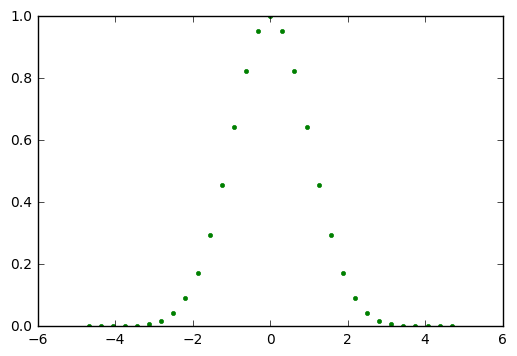

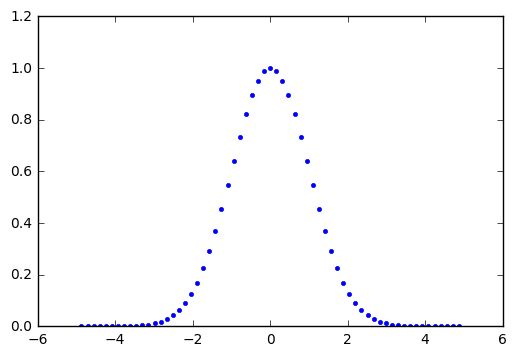

In [3]:
M = 2**7
x_space = np.linspace(-20, 20, num = M, endpoint = False)
dx = abs(x_space[1] - x_space[0])
#инвариант для преобразований без двух пи
f = np.exp(-(x_space * x_space)/2)

plt.plot(x_space[(x_space>-5) & (x_space<5)], f[(x_space>-5) & (x_space<5)], 'g.')
plt.show()

xi_space = 2*pi*fft.fftfreq(M, d = dx)

f_hat= (1/np.sqrt(2*np.pi)) * make_rad_fft(f, dx)
# Рисуем только те же значения xi, для которых мы определяли функцию по x, 
# чтобы сравнение картинок получилось наглядным
# Мы не использовали сдвиг ответа, но это то, что нужно сделать, если потом нужно применять не ifft

plt.plot(xi_space[(xi_space>-5) & (xi_space<5)], f_hat.real[(xi_space>-5) & (xi_space<5)], 'b.')
plt.show()

# мнимая часть мала, но есть. Можно раскомментировать, чтобы на неё посмотреть.
# plt.plot(xi_space[(xi_space>-10) & (xi_space<10)], f_hat.imag[(xi_space>-10) & (xi_space<10)], 'r.')
# plt.show()